In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
df=pd.read_csv('/content/drive/MyDrive/Portofolio/Improving Employee Retention by Predicting Employee Attrition Using Machine Learning/Improving Employee Retention by Predicting Employee Attrition Using Machine Learning.xlsx - hr_data.csv')
pd.pandas.set_option("display.max_columns",None)
df.head(10)

,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,NomorHP,Email,TingkatPendidikan,PernahBekerja,IkutProgramLOP,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign
0,spiritedPorpoise3,111065,Belum_menikah,Pria,Outsource,Software Engineer (Back End),Freshgraduate_program,Sangat_bagus,Jakarta Timur,Employee_Referral,4,4.0,0.0,0.0,9.0,+6282232522xxx,spiritedPorpoise3135@yahoo.com,Magister,1,1.0,masih_bekerja,1972-07-01,2011-01-10,2016-2-15,-
1,jealousGelding2,106080,Belum_menikah,Pria,FullTime,Data Analyst,Freshgraduate_program,Sangat_kurang,Jakarta Utara,Website,4,4.0,4.0,0.0,3.0,+6281270745xxx,jealousGelding2239@yahoo.com,Sarjana,1,1.0,toxic_culture,1984-04-26,2014-01-06,2020-1-17,2018-6-16
2,pluckyMuesli3,106452,Menikah,Pria,FullTime,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Timur,Indeed,4,3.0,0.0,0.0,11.0,+6281346215xxx,pluckyMuesli3961@icloud.com,Magister,1,1.0,jam_kerja,1974-01-07,2011-01-10,2016-01-10,2014-9-24
3,stressedTruffle1,106325,Belum_menikah,Pria,Outsource,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Pusat,LinkedIn,3,3.0,0.0,4.0,6.0,+6283233846xxx,stressedTruffle1406@hotmail.com,Sarjana,1,0.0,masih_bekerja,1979-11-24,2014-2-17,2020-02-04,-
4,shyTermite7,111171,Belum_menikah,Wanita,FullTime,Product Manager,Freshgraduate_program,Bagus,Jakarta Timur,LinkedIn,3,3.0,0.0,0.0,11.0,+6287883263xxx,shyTermite7149@gmail.com,Sarjana,1,0.0,ganti_karir,1974-11-07,2013-11-11,2020-1-22,2018-09-06
5,emptyMacaw4,106419,Belum_menikah,Wanita,Outsource,Software Engineer (Front End),Senior_level,Biasa,Jakarta Selatan,Indeed,3,4.0,6.0,0.0,10.0,+6283886053xxx,emptyMacaw4468@yahoo.com,Sarjana,1,0.0,masih_bekerja,1980-05-12,2016-10-02,2020-02-06,-
6,madZebra1,100309,Menikah,Wanita,FullTime,Data Analyst,Freshgraduate_program,Biasa,Jakarta Utara,LinkedIn,2,3.0,4.0,0.0,19.0,+6285735701xxx,madZebra1244@icloud.com,Sarjana,1,NaN,masih_bekerja,1979-05-24,2014-11-10,2020-01-02,-
7,cynicalMandrill7,110500,Belum_menikah,Pria,FullTime,Software Engineer (Back End),Senior_level,Kurang,Jakarta Selatan,LinkedIn,2,5.0,0.0,0.0,4.0,+6281293511xxx,cynicalMandrill7920@hotmail.com,Magister,1,NaN,masih_bekerja,1983-08-24,2013-07-08,2020-1-14,-
8,lyingMussel8,110533,Bercerai,Pria,FullTime,Software Engineer (Android),Senior_level,Sangat_kurang,Jakarta Selatan,Employee_Referral,3,NaN,0.0,0.0,5.0,+6281276485xxx,lyingMussel8944@proton.com,Magister,1,NaN,masih_bekerja,1980-08-26,2016-07-06,2020-2-28,-
9,enviousMoth4,110927,Menikah,Wanita,FullTime,Software Engineer (Android),Freshgraduate_program,Sangat_bagus,Jakarta Pusat,Indeed,4,5.0,6.0,0.0,4.0,+6281391211xxx,enviousMoth4516@yahoo.com,Sarjana,1,NaN,masih_bekerja,1984-02-21,2015-3-30,2020-01-03,-


**EDA**

In [7]:
duplicates = df[df.duplicated()]

print("Duplicate Rows:")
print(duplicates)


Duplicate Rows:
Empty DataFrame
Columns: [Username, EnterpriseID, StatusPernikahan, JenisKelamin, StatusKepegawaian, Pekerjaan, JenjangKarir, PerformancePegawai, AsalDaerah, HiringPlatform, SkorSurveyEngagement, SkorKepuasanPegawai, JumlahKeikutsertaanProjek, JumlahKeterlambatanSebulanTerakhir, JumlahKetidakhadiran, NomorHP, Email, TingkatPendidikan, PernahBekerja, IkutProgramLOP, AlasanResign, TanggalLahir, TanggalHiring, TanggalPenilaianKaryawan, TanggalResign]
Index: []


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 25 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Username                            287 non-null    object 
 1   EnterpriseID                        287 non-null    int64  
 2   StatusPernikahan                    287 non-null    object 
 3   JenisKelamin                        287 non-null    object 
 4   StatusKepegawaian                   287 non-null    object 
 5   Pekerjaan                           287 non-null    object 
 6   JenjangKarir                        287 non-null    object 
 7   PerformancePegawai                  287 non-null    object 
 8   AsalDaerah                          287 non-null    object 
 9   HiringPlatform                      287 non-null    object 
 10  SkorSurveyEngagement                287 non-null    int64  
 11  SkorKepuasanPegawai                 282 non-n

In [9]:
df.isnull().sum()

Username                                0
EnterpriseID                            0
StatusPernikahan                        0
JenisKelamin                            0
StatusKepegawaian                       0
Pekerjaan                               0
JenjangKarir                            0
PerformancePegawai                      0
AsalDaerah                              0
HiringPlatform                          0
SkorSurveyEngagement                    0
SkorKepuasanPegawai                     5
JumlahKeikutsertaanProjek               3
JumlahKeterlambatanSebulanTerakhir      1
JumlahKetidakhadiran                    6
NomorHP                                 0
Email                                   0
TingkatPendidikan                       0
PernahBekerja                           0
IkutProgramLOP                        258
AlasanResign                           66
TanggalLahir                            0
TanggalHiring                           0
TanggalPenilaianKaryawan          

In [10]:
# Fill missing values with column means
df['SkorKepuasanPegawai'].fillna(df['SkorKepuasanPegawai'].mean(), inplace=True)
df['JumlahKeikutsertaanProjek'].fillna(df['JumlahKeikutsertaanProjek'].mean(), inplace=True)
df['JumlahKeterlambatanSebulanTerakhir'].fillna(df['JumlahKeterlambatanSebulanTerakhir'].mean(), inplace=True)
df['JumlahKetidakhadiran'].fillna(df['JumlahKetidakhadiran'].mean(), inplace=True)

# Drop the 'IkutProgramLOP' column
df.drop(columns=['IkutProgramLOP'], inplace=True)

# Display the filled DataFrame
print(df.isnull().sum())

Username                               0
EnterpriseID                           0
StatusPernikahan                       0
JenisKelamin                           0
StatusKepegawaian                      0
Pekerjaan                              0
JenjangKarir                           0
PerformancePegawai                     0
AsalDaerah                             0
HiringPlatform                         0
SkorSurveyEngagement                   0
SkorKepuasanPegawai                    0
JumlahKeikutsertaanProjek              0
JumlahKeterlambatanSebulanTerakhir     0
JumlahKetidakhadiran                   0
NomorHP                                0
Email                                  0
TingkatPendidikan                      0
PernahBekerja                          0
AlasanResign                          66
TanggalLahir                           0
TanggalHiring                          0
TanggalPenilaianKaryawan               0
TanggalResign                          0
dtype: int64


In [11]:
# Fill missing values in the 'AlasanResign' column
df['AlasanResign'].fillna('Tidak_Diketahui', inplace=True)

In [12]:
df.isnull().sum()

Username                              0
EnterpriseID                          0
StatusPernikahan                      0
JenisKelamin                          0
StatusKepegawaian                     0
Pekerjaan                             0
JenjangKarir                          0
PerformancePegawai                    0
AsalDaerah                            0
HiringPlatform                        0
SkorSurveyEngagement                  0
SkorKepuasanPegawai                   0
JumlahKeikutsertaanProjek             0
JumlahKeterlambatanSebulanTerakhir    0
JumlahKetidakhadiran                  0
NomorHP                               0
Email                                 0
TingkatPendidikan                     0
PernahBekerja                         0
AlasanResign                          0
TanggalLahir                          0
TanggalHiring                         0
TanggalPenilaianKaryawan              0
TanggalResign                         0
dtype: int64

In [13]:
# Check the unique values and their counts in the 'PernahBekerja' column
pernah_bekerja_counts = df['PernahBekerja'].value_counts()

# Display the unique values and their counts
print(pernah_bekerja_counts)

1      286
yes      1
Name: PernahBekerja, dtype: int64


In [17]:
# Replace 'yes' with 1 in the 'PernahBekerja' column
df['PernahBekerja'].replace({'yes': 1}, inplace=True)

In [19]:
df.head(5)

,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,NomorHP,Email,TingkatPendidikan,PernahBekerja,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign
0,spiritedPorpoise3,111065,Belum_menikah,Pria,Outsource,Software Engineer (Back End),Freshgraduate_program,Sangat_bagus,Jakarta Timur,Employee_Referral,4,4.0,0.0,0.0,9.0,+6282232522xxx,spiritedPorpoise3135@yahoo.com,Magister,1,masih_bekerja,1972-07-01,2011-01-10,2016-2-15,-
1,jealousGelding2,106080,Belum_menikah,Pria,FullTime,Data Analyst,Freshgraduate_program,Sangat_kurang,Jakarta Utara,Website,4,4.0,4.0,0.0,3.0,+6281270745xxx,jealousGelding2239@yahoo.com,Sarjana,1,toxic_culture,1984-04-26,2014-01-06,2020-1-17,2018-6-16
2,pluckyMuesli3,106452,Menikah,Pria,FullTime,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Timur,Indeed,4,3.0,0.0,0.0,11.0,+6281346215xxx,pluckyMuesli3961@icloud.com,Magister,1,jam_kerja,1974-01-07,2011-01-10,2016-01-10,2014-9-24
3,stressedTruffle1,106325,Belum_menikah,Pria,Outsource,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Pusat,LinkedIn,3,3.0,0.0,4.0,6.0,+6283233846xxx,stressedTruffle1406@hotmail.com,Sarjana,1,masih_bekerja,1979-11-24,2014-2-17,2020-02-04,-
4,shyTermite7,111171,Belum_menikah,Wanita,FullTime,Product Manager,Freshgraduate_program,Bagus,Jakarta Timur,LinkedIn,3,3.0,0.0,0.0,11.0,+6287883263xxx,shyTermite7149@gmail.com,Sarjana,1,ganti_karir,1974-11-07,2013-11-11,2020-1-22,2018-09-06


In [20]:
# Create the DataFrame
df_unique = pd.DataFrame(df)

# Display unique values in each column
for column in df_unique.columns:
    unique_values = df_unique[column].unique()
    print(f"Unique values in column '{column}': {unique_values}")

Unique values in column 'Username': ['spiritedPorpoise3' 'jealousGelding2' 'pluckyMuesli3' 'stressedTruffle1'
 'shyTermite7' 'emptyMacaw4' 'madZebra1' 'cynicalMandrill7' 'lyingMussel8'
 'enviousMoth4' 'puzzledCake4' 'grizzledSnipe7' 'yearningBagels0'
 'sheepishSheep9' 'madWildfowl7' 'enviousSalami4' 'pacifiedRaisins7'
 'wrathfulMagpie6' 'hushedSeahorse7' 'guiltyMoth4' 'peacefulCoati5'
 'dejectedPolenta7' 'needfulLeopard2' 'offendedIguana0' 'pluckyHoopoe3'
 'needySyrup4' 'forsakenOwl1' 'pluckyApples4' 'guiltySnail8'
 'grizzledFlamingo9' 'worriedSyrup7' 'somberBoars0' 'giddyMallard9'
 'madFerret4' 'mereCaribou1' 'decimalAbalone6' 'blissfulMussel3'
 'ardentLapwing0' 'peskyTeal7' 'blissfulHyena1' 'solidMacaw1'
 'cautiousPolenta9' 'excludedPorpoise4' 'shamefulIguana0' 'shySyrup7'
 'forsakenCow7' 'grumpyFish4' 'wingedPorpoise5' 'soreCaribou0'
 'needfulCardinal0' 'giddyCheetah9' 'hushedOil9' 'crummyPudding5'
 'selfishBasmati2' 'adoringCardinal9' 'importedApricots7' 'grizzledCod7'
 'insecureSh

In [21]:
# Create a DataFrame
single_unique = pd.DataFrame(df)

# Find columns with only one unique value
single_unique_columns = [col for col in single_unique.columns if single_unique[col].nunique() == 1]

# Display columns with only one unique value
print("Columns with only one unique value:")
print(single_unique_columns)

Columns with only one unique value:
[]


In [22]:
df.drop(columns=['PernahBekerja'], inplace=True)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 23 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Username                            287 non-null    object 
 1   EnterpriseID                        287 non-null    int64  
 2   StatusPernikahan                    287 non-null    object 
 3   JenisKelamin                        287 non-null    object 
 4   StatusKepegawaian                   287 non-null    object 
 5   Pekerjaan                           287 non-null    object 
 6   JenjangKarir                        287 non-null    object 
 7   PerformancePegawai                  287 non-null    object 
 8   AsalDaerah                          287 non-null    object 
 9   HiringPlatform                      287 non-null    object 
 10  SkorSurveyEngagement                287 non-null    int64  
 11  SkorKepuasanPegawai                 287 non-n

In [24]:
# Fataframe
df_aggregate = pd.DataFrame(df)

# Convertion colunm TanggalHiring and TanggalResign to datetime
df["TanggalHiring"] = pd.to_datetime(df["TanggalHiring"])
# Change - to 0
df["TanggalResign"].replace("-", "0000-01-01", inplace=True)

# Conversion to datetime
df["TanggalResign"] = pd.to_datetime(df["TanggalResign"], errors="coerce")

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 23 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Username                            287 non-null    object        
 1   EnterpriseID                        287 non-null    int64         
 2   StatusPernikahan                    287 non-null    object        
 3   JenisKelamin                        287 non-null    object        
 4   StatusKepegawaian                   287 non-null    object        
 5   Pekerjaan                           287 non-null    object        
 6   JenjangKarir                        287 non-null    object        
 7   PerformancePegawai                  287 non-null    object        
 8   AsalDaerah                          287 non-null    object        
 9   HiringPlatform                      287 non-null    object        
 10  SkorSurveyEngagement      

In [26]:
# Extract hiring and resign date
df["TahunHiring"] = df["TanggalHiring"].dt.year
df["TahunResign"] = df["TanggalResign"].dt.year

# Aggregate (TanggalHiring)
masuk_agregat = df.groupby("TahunHiring").size().reset_index(name="JumlahKeikutsertaanProjek")

# Aggregate (TanggalResign)
keluar_agregat = df.groupby("TahunResign").size().reset_index(name="JumlahKeikutsertaanProjek")

print("Tabel Agregat Karyawan Masuk:")
print(masuk_agregat)

print("\nTabel Agregat Karyawan Keluar:")
print(keluar_agregat)

Tabel Agregat Karyawan Masuk:
    TahunHiring  JumlahKeikutsertaanProjek
0          2006                          1
1          2007                          2
2          2008                          2
3          2009                          7
4          2010                          8
5          2011                         76
6          2012                         41
7          2013                         43
8          2014                         56
9          2015                         31
10         2016                         14
11         2017                          5
12         2018                          1

Tabel Agregat Karyawan Keluar:
   TahunResign  JumlahKeikutsertaanProjek
0       2013.0                          5
1       2014.0                         12
2       2015.0                          8
3       2016.0                          8
4       2017.0                         19
5       2018.0                         26
6       2019.0                          5


In [27]:
df['TahunResign'] = df['TahunResign'].astype('Int64')

In [28]:
# Membuat tabel terpisah untuk TahunHiring
tahun_hiring = df["TahunHiring"].value_counts().sort_index().reset_index()
tahun_hiring.columns = ["Tahun", "Total Karyawan Hiring"]

# Membuat tabel terpisah untuk TahunResign
tahun_resign = df["TahunResign"].value_counts().sort_index().reset_index()
tahun_resign.columns = ["Tahun", "Total Karyawan Resign"]

# Outer join kedua tabel terpisah
Tahun_Hiring_Resign = pd.merge(tahun_hiring, tahun_resign, on="Tahun", how="outer")

# Mengisi nilai NaN dengan 0
Tahun_Hiring_Resign.fillna(0, inplace=True)

print("Tahun Karyawan Hiring dan Resign:")
print(Tahun_Hiring_Resign)

Tahun Karyawan Hiring dan Resign:
    Tahun  Total Karyawan Hiring  Total Karyawan Resign
0    2006                    1.0                      0
1    2007                    2.0                      0
2    2008                    2.0                      0
3    2009                    7.0                      0
4    2010                    8.0                      0
5    2011                   76.0                      0
6    2012                   41.0                      0
7    2013                   43.0                      5
8    2014                   56.0                     12
9    2015                   31.0                      8
10   2016                   14.0                      8
11   2017                    5.0                     19
12   2018                    1.0                     26
13   2019                    0.0                      5
14   2020                    0.0                      6


In [29]:
df.isnull().sum()

Username                                0
EnterpriseID                            0
StatusPernikahan                        0
JenisKelamin                            0
StatusKepegawaian                       0
Pekerjaan                               0
JenjangKarir                            0
PerformancePegawai                      0
AsalDaerah                              0
HiringPlatform                          0
SkorSurveyEngagement                    0
SkorKepuasanPegawai                     0
JumlahKeikutsertaanProjek               0
JumlahKeterlambatanSebulanTerakhir      0
JumlahKetidakhadiran                    0
NomorHP                                 0
Email                                   0
TingkatPendidikan                       0
AlasanResign                            0
TanggalLahir                            0
TanggalHiring                           0
TanggalPenilaianKaryawan                0
TanggalResign                         198
TahunHiring                       

In [30]:
Tahun_Hiring_Resign

,Tahun,Total Karyawan Hiring,Total Karyawan Resign
0,2006,1.0,0
1,2007,2.0,0
2,2008,2.0,0
3,2009,7.0,0
4,2010,8.0,0
5,2011,76.0,0
6,2012,41.0,0
7,2013,43.0,5
8,2014,56.0,12
9,2015,31.0,8


In [31]:
# Menghitung total karyawan yang masih bertahan
Tahun_Hiring_Resign["Total Karyawan Masih Bertahan"] = abs(Tahun_Hiring_Resign["Total Karyawan Hiring"] - Tahun_Hiring_Resign["Total Karyawan Resign"])

# Menghitung perubahan karyawan sebagai selisih total karyawan dengan total karyawan resign
Tahun_Hiring_Resign["Perubahan Karyawan"] = abs(Tahun_Hiring_Resign["Total Karyawan Resign"] - Tahun_Hiring_Resign["Total Karyawan Hiring"])

print("Tabel Hasil Perhitungan:")
Tahun_Hiring_Resign

Tabel Hasil Perhitungan:


,Tahun,Total Karyawan Hiring,Total Karyawan Resign,Total Karyawan Masih Bertahan,Perubahan Karyawan
0,2006,1.0,0,1.0,1.0
1,2007,2.0,0,2.0,2.0
2,2008,2.0,0,2.0,2.0
3,2009,7.0,0,7.0,7.0
4,2010,8.0,0,8.0,8.0
5,2011,76.0,0,76.0,76.0
6,2012,41.0,0,41.0,41.0
7,2013,43.0,5,38.0,38.0
8,2014,56.0,12,44.0,44.0
9,2015,31.0,8,23.0,23.0


In [32]:
# Menambah kolom "Ada Perubahan Karyawan" dengan nilai "Yes" jika ada perubahan, dan "No" jika tidak ada
Tahun_Hiring_Resign["Ada Perubahan Karyawan"] = Tahun_Hiring_Resign["Perubahan Karyawan"].apply(lambda x: "Ya" if x > 0 else "Tidak")
Tahun_Hiring_Resign

,Tahun,Total Karyawan Hiring,Total Karyawan Resign,Total Karyawan Masih Bertahan,Perubahan Karyawan,Ada Perubahan Karyawan
0,2006,1.0,0,1.0,1.0,Ya
1,2007,2.0,0,2.0,2.0,Ya
2,2008,2.0,0,2.0,2.0,Ya
3,2009,7.0,0,7.0,7.0,Ya
4,2010,8.0,0,8.0,8.0,Ya
5,2011,76.0,0,76.0,76.0,Ya
6,2012,41.0,0,41.0,41.0,Ya
7,2013,43.0,5,38.0,38.0,Ya
8,2014,56.0,12,44.0,44.0,Ya
9,2015,31.0,8,23.0,23.0,Ya


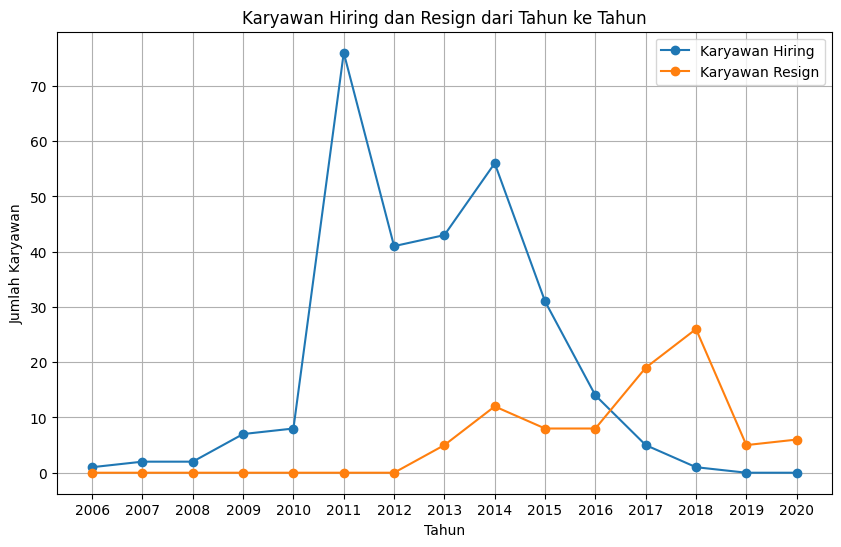

In [34]:
# Menggantikan tipe data float menjadi integer
Tahun_Hiring_Resign['Tahun'] = Tahun_Hiring_Resign['Tahun'].astype(int)

# Menyiapkan data untuk diagram garis
years = Tahun_Hiring_Resign["Tahun"]
hiring = Tahun_Hiring_Resign["Total Karyawan Hiring"]
resign = Tahun_Hiring_Resign["Total Karyawan Resign"]

# Membuat ukuran gambar lebih besar
plt.figure(figsize=(10, 6))  # Ubah ukuran sesuai kebutuhan (lebar x tinggi)

# Membuat diagram garis
plt.plot(years, hiring, marker='o', label='Karyawan Hiring')
plt.plot(years, resign, marker='o', label='Karyawan Resign')

# Menambahkan judul, label sumbu, legenda, dan grid
plt.title("Karyawan Hiring dan Resign dari Tahun ke Tahun")
plt.xlabel("Tahun")
plt.ylabel("Jumlah Karyawan")
plt.xticks(years)  # Mengganti angka dengan label tahun, dan rotasi 45 derajat
plt.legend()
plt.grid(True)

# Menampilkan diagram
plt.show()

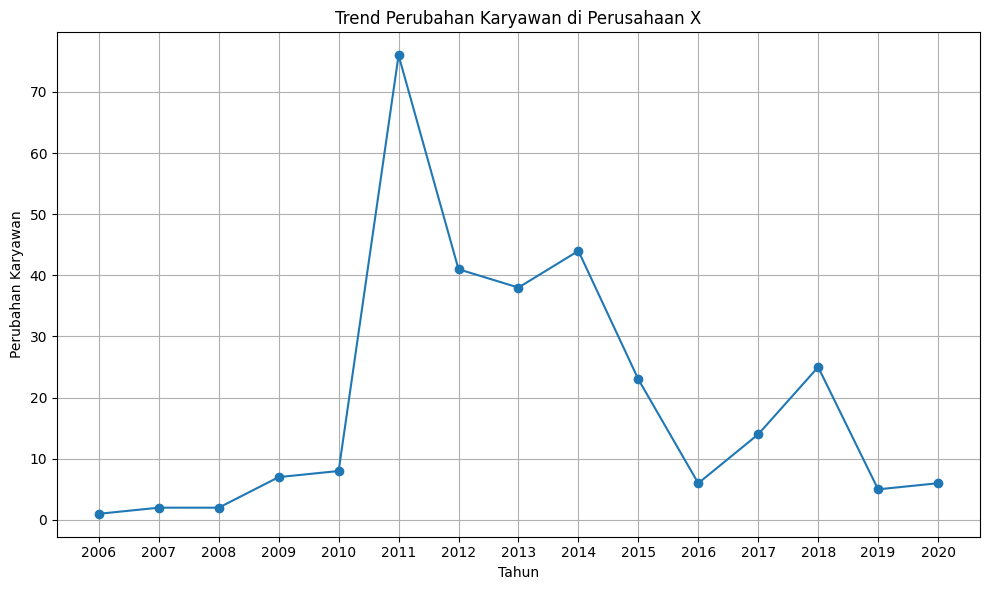

In [35]:
# Plot tren chart perubahan karyawan dengan line plot
plt.figure(figsize=(10, 6))
plt.plot(Tahun_Hiring_Resign["Tahun"], Tahun_Hiring_Resign["Perubahan Karyawan"], marker='o')
plt.xlabel('Tahun')
plt.ylabel('Perubahan Karyawan')
plt.title('Trend Perubahan Karyawan di Perusahaan X')
plt.xticks(Tahun_Hiring_Resign["Tahun"])
plt.grid(True)
plt.tight_layout()
plt.show()

In [36]:
hr_data_df = df

resigned_df = hr_data_df[hr_data_df['AlasanResign'] != 'masih_bekerja']

not_resigned_df = hr_data_df[hr_data_df['AlasanResign'] == 'masih_bekerja']

resigned_job_count = resigned_df['Pekerjaan'].value_counts().reset_index()
resigned_job_count.columns = ['Pekerjaan', 'Jumlah']

not_resigned_job_count = not_resigned_df['Pekerjaan'].value_counts().reset_index()
not_resigned_job_count.columns = ['Pekerjaan', 'Jumlah']

In [37]:
def print_distribution(df, status):
    print(f"Karyawan yang {status}:")
    for index, row in df.iterrows():
        print(f"- {row['Pekerjaan']}: {row['Jumlah']} karyawan {status}.")
    print("\n")

print_distribution(resigned_job_count, 'Sudah Resign')

Karyawan yang Sudah Resign:
- Software Engineer (Back End): 57 karyawan Sudah Resign.
- Software Engineer (Front End): 41 karyawan Sudah Resign.
- Product Design (UI & UX): 12 karyawan Sudah Resign.
- Software Engineer (Android): 12 karyawan Sudah Resign.
- Data Analyst: 11 karyawan Sudah Resign.
- Product Manager: 11 karyawan Sudah Resign.
- Data Engineer: 5 karyawan Sudah Resign.
- DevOps Engineer: 2 karyawan Sudah Resign.
- Machine Learning Engineer: 2 karyawan Sudah Resign.
- Digital Product Manager: 1 karyawan Sudah Resign.
- Software Engineer (iOS): 1 karyawan Sudah Resign.




In [38]:
print_distribution(not_resigned_job_count, 'Belum Resign')

Karyawan yang Belum Resign:
- Software Engineer (Back End): 52 karyawan Belum Resign.
- Software Engineer (Front End): 31 karyawan Belum Resign.
- Software Engineer (Android): 12 karyawan Belum Resign.
- Product Design (UI & UX): 12 karyawan Belum Resign.
- Product Manager: 6 karyawan Belum Resign.
- Data Analyst: 5 karyawan Belum Resign.
- Data Engineer: 5 karyawan Belum Resign.
- Scrum Master: 3 karyawan Belum Resign.
- Software Engineer (iOS): 2 karyawan Belum Resign.
- Product Design (UX Researcher): 1 karyawan Belum Resign.
- Digital Product Manager: 1 karyawan Belum Resign.
- DevOps Engineer: 1 karyawan Belum Resign.
- Software Architect: 1 karyawan Belum Resign.




In [41]:
merged_df = pd.merge(resigned_job_count, not_resigned_job_count, on='Pekerjaan', how='outer', suffixes=('_Resign', '_Belum_Resign'))

merged_df = merged_df.fillna(0)

merged_df.columns = ['Pekerjaan', 'Jumlah Resign', 'Jumlah Belum Resign']

merged_df.head()

,Pekerjaan,Jumlah Resign,Jumlah Belum Resign
0,Software Engineer (Back End),57.0,52.0
1,Software Engineer (Front End),41.0,31.0
2,Product Design (UI & UX),12.0,12.0
3,Software Engineer (Android),12.0,12.0
4,Data Analyst,11.0,5.0


In [42]:
merged_df['Jumlah Employee'] = merged_df['Jumlah Resign'] + merged_df['Jumlah Belum Resign']

merged_df['Persentase Belum Resign'] = round((merged_df['Jumlah Belum Resign'] / merged_df['Jumlah Employee']) * 100)

merged_df.head()

,Pekerjaan,Jumlah Resign,Jumlah Belum Resign,Jumlah Employee,Persentase Belum Resign
0,Software Engineer (Back End),57.0,52.0,109.0,48.0
1,Software Engineer (Front End),41.0,31.0,72.0,43.0
2,Product Design (UI & UX),12.0,12.0,24.0,50.0
3,Software Engineer (Android),12.0,12.0,24.0,50.0
4,Data Analyst,11.0,5.0,16.0,31.0


In [43]:
def split_label(label, max_len=15):
    words = label.split()
    lines = []
    current_line = words[0]
    for word in words[1:]:
        if len(current_line + " " + word) <= max_len:
            current_line += " " + word
        else:
            lines.append(current_line)
            current_line = word
    lines.append(current_line)
    return "\n".join(lines)

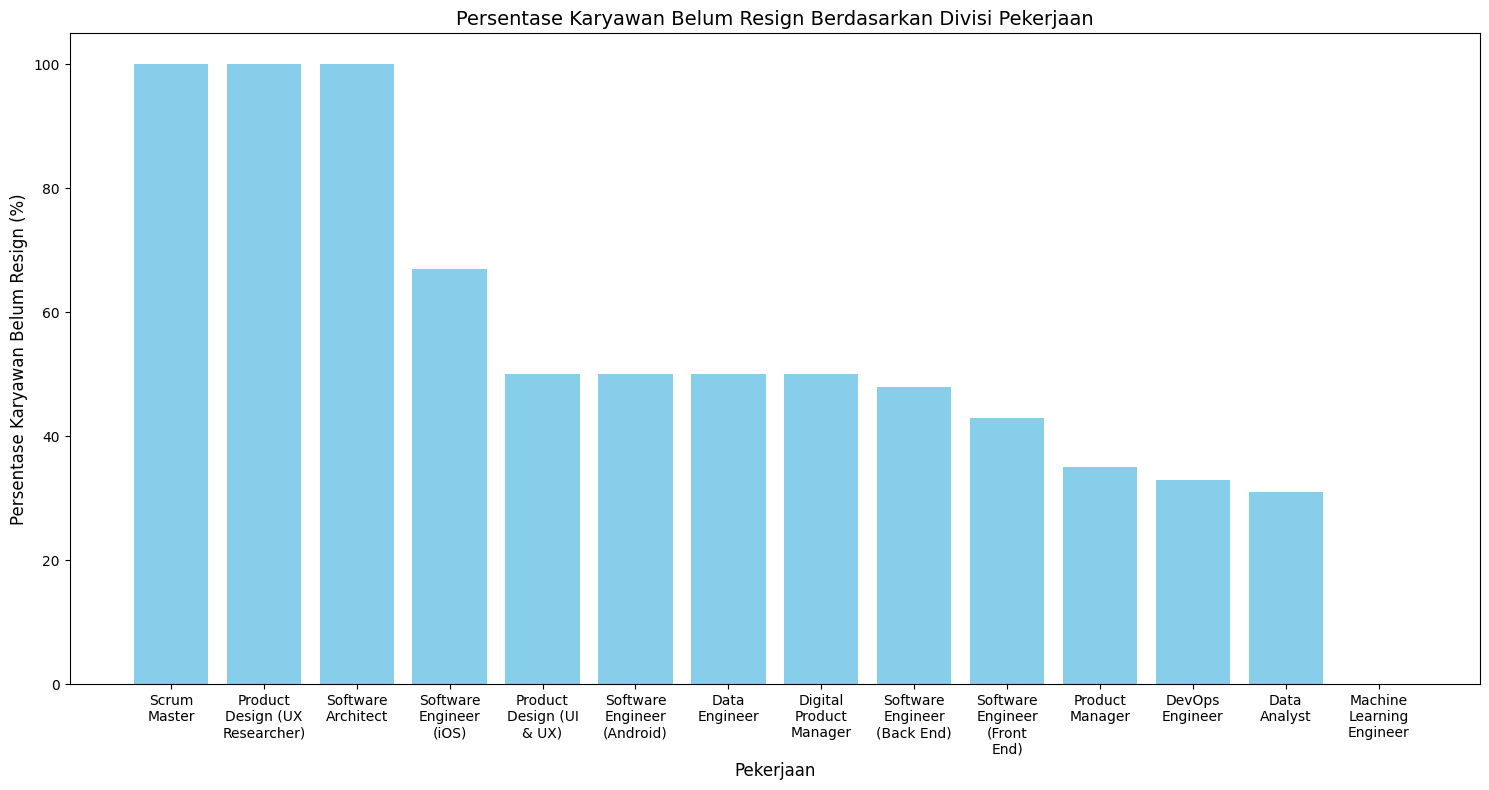

In [45]:
import matplotlib.pyplot as plt


sorted_merged_df = merged_df.sort_values('Persentase Belum Resign', ascending=False)

updated_labels_sorted = [split_label(label, max_len=10) for label in sorted_merged_df['Pekerjaan']]

bar_color = 'skyblue'

plt.figure(figsize=[15,8])
plt.bar(sorted_merged_df['Pekerjaan'], sorted_merged_df['Persentase Belum Resign'], tick_label=updated_labels_sorted, color=bar_color)
plt.xlabel('Pekerjaan', fontsize=12)
plt.ylabel('Persentase Karyawan Belum Resign (%)', fontsize=12)
plt.title('Persentase Karyawan Belum Resign Berdasarkan Divisi Pekerjaan', fontsize=14)
plt.xticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()


In [46]:
division_with_highest_resign_rate = sorted_merged_df.iloc[-1]['Pekerjaan']

division_data = resigned_df[resigned_df['Pekerjaan'] == division_with_highest_resign_rate]

aggregated_data = division_data.groupby(['JenjangKarir', 'PerformancePegawai', 'AlasanResign']).size().reset_index(name='Jumlah_Resign')

division_with_highest_resign_rate, aggregated_data.head()
sorted_merged_df.tail()

,Pekerjaan,Jumlah Resign,Jumlah Belum Resign,Jumlah Employee,Persentase Belum Resign
1,Software Engineer (Front End),41.0,31.0,72.0,43.0
5,Product Manager,11.0,6.0,17.0,35.0
7,DevOps Engineer,2.0,1.0,3.0,33.0
4,Data Analyst,11.0,5.0,16.0,31.0
8,Machine Learning Engineer,2.0,0.0,2.0,0.0


In [47]:
division_with_highest_resign_rate = "Software Engineer (Front End)"
division_data = resigned_df[resigned_df['Pekerjaan'] == division_with_highest_resign_rate]

aggregated_data_highest_resign_rate = division_data.groupby(['JenjangKarir', 'PerformancePegawai', 'AlasanResign']).size().reset_index(name='Jumlah_Resign')

division_with_highest_resign_rate, aggregated_data_highest_resign_rate.head()

('Software Engineer (Front End)',
             JenjangKarir PerformancePegawai       AlasanResign  Jumlah_Resign
 0  Freshgraduate_program              Bagus    Tidak_Diketahui              2
 1  Freshgraduate_program              Bagus          jam_kerja              2
 2  Freshgraduate_program              Bagus  tidak_bisa_remote              1
 3  Freshgraduate_program              Biasa    Tidak_Diketahui              2
 4  Freshgraduate_program              Biasa          apresiasi              1)

<ipython-input-48-75bd91a4227f>:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  pivot_data['Total_Resign'] = pivot_data.sum(axis=1)


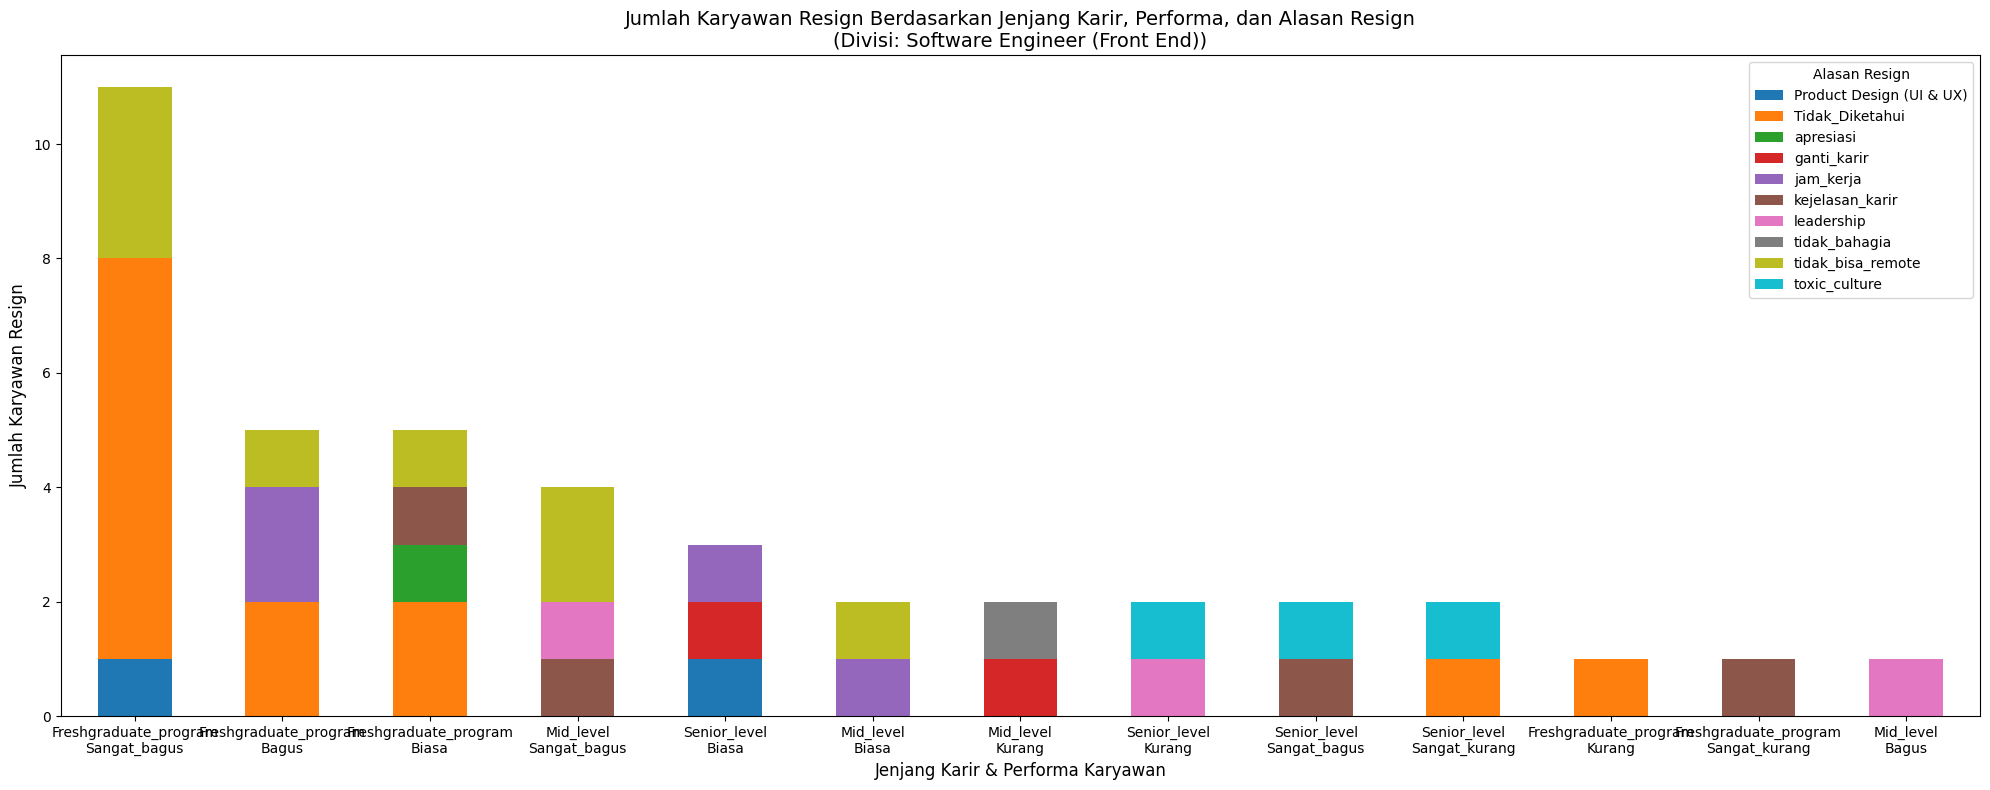

In [48]:
pivot_data = aggregated_data_highest_resign_rate.pivot_table(index=['JenjangKarir', 'PerformancePegawai'], columns='AlasanResign', values='Jumlah_Resign', fill_value=0)
pivot_data = pivot_data.reset_index()

pivot_data['Total_Resign'] = pivot_data.sum(axis=1)

sorted_pivot_data = pivot_data.sort_values('Total_Resign', ascending=False)

updated_index_labels = [f"{row['JenjangKarir']}\n{row['PerformancePegawai']}" for _, row in sorted_pivot_data.iterrows()]

ax = sorted_pivot_data.set_index(['JenjangKarir', 'PerformancePegawai']).drop(columns='Total_Resign').plot(kind='bar', stacked=True, figsize=(20, 8))
plt.xlabel('Jenjang Karir & Performa Karyawan', fontsize=12)
plt.ylabel('Jumlah Karyawan Resign', fontsize=12)
plt.title('Jumlah Karyawan Resign Berdasarkan Jenjang Karir, Performa, dan Alasan Resign\n(Divisi: Software Engineer (Front End))', fontsize=14)
plt.legend(title='Alasan Resign')
plt.xticks(ticks=range(len(updated_index_labels)), labels=updated_index_labels, rotation=0)
plt.tight_layout()
plt.show()

In [49]:
df.isnull().sum()

Username                                0
EnterpriseID                            0
StatusPernikahan                        0
JenisKelamin                            0
StatusKepegawaian                       0
Pekerjaan                               0
JenjangKarir                            0
PerformancePegawai                      0
AsalDaerah                              0
HiringPlatform                          0
SkorSurveyEngagement                    0
SkorKepuasanPegawai                     0
JumlahKeikutsertaanProjek               0
JumlahKeterlambatanSebulanTerakhir      0
JumlahKetidakhadiran                    0
NomorHP                                 0
Email                                   0
TingkatPendidikan                       0
AlasanResign                            0
TanggalLahir                            0
TanggalHiring                           0
TanggalPenilaianKaryawan                0
TanggalResign                         198
TahunHiring                       

In [50]:
missing_values = df.isnull().sum()
print(missing_values)

Username                                0
EnterpriseID                            0
StatusPernikahan                        0
JenisKelamin                            0
StatusKepegawaian                       0
Pekerjaan                               0
JenjangKarir                            0
PerformancePegawai                      0
AsalDaerah                              0
HiringPlatform                          0
SkorSurveyEngagement                    0
SkorKepuasanPegawai                     0
JumlahKeikutsertaanProjek               0
JumlahKeterlambatanSebulanTerakhir      0
JumlahKetidakhadiran                    0
NomorHP                                 0
Email                                   0
TingkatPendidikan                       0
AlasanResign                            0
TanggalLahir                            0
TanggalHiring                           0
TanggalPenilaianKaryawan                0
TanggalResign                         198
TahunHiring                       

In [52]:
df.fillna(method='ffill', inplace=True)

In [53]:
duplicate_rows = df.duplicated().sum()
print(f'Jumlah baris duplikat: {duplicate_rows}')

df = df.drop_duplicates()

Jumlah baris duplikat: 0


In [54]:
for column in df.select_dtypes(include=['Int64']).columns:
    df[column] = df[column].astype('float64')

for column in df.select_dtypes(include=['float64']).columns:
    df[column] = df[column].fillna(df[column].median())

missing_values_after_conversion = df.isnull().sum().sum()
missing_values_after_conversion


1

In [55]:
missing_values_columns = df.isnull().sum()
missing_values_columns[missing_values_columns > 0]


TanggalResign    1
dtype: int64

In [56]:
df = df.dropna(subset=['TanggalResign'])

In [57]:
missing_values_columns = df.isnull().sum()
missing_values_columns[missing_values_columns > 0]

Series([], dtype: int64)

In [58]:
duplicate_rows = df.duplicated()

number_of_duplicate_rows = duplicate_rows.sum()
number_of_duplicate_rows

0

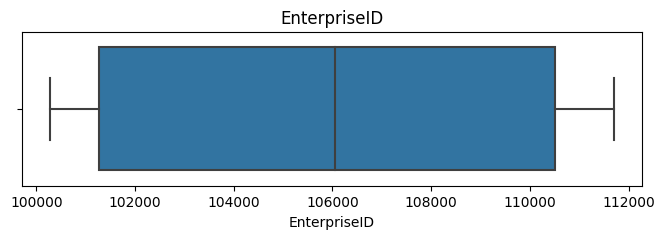

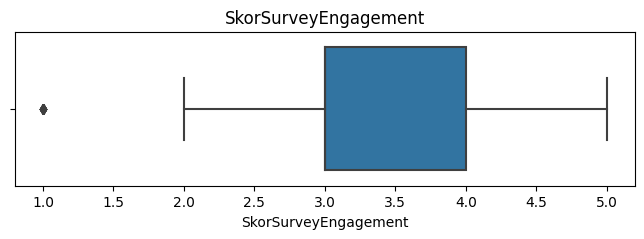

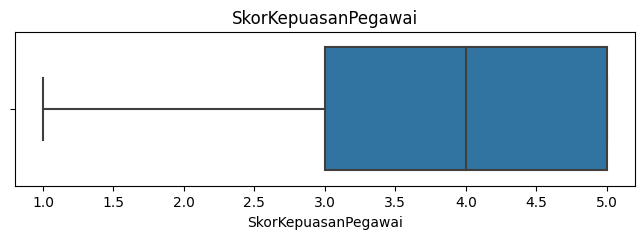

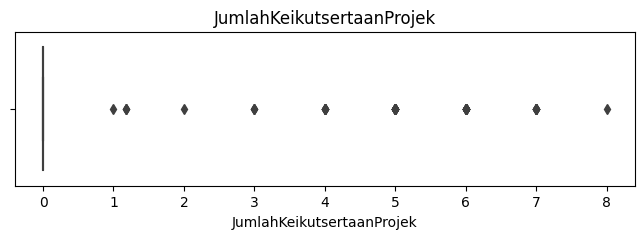

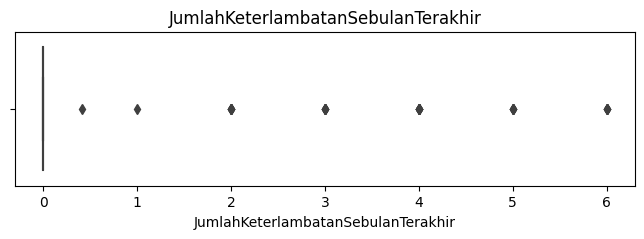

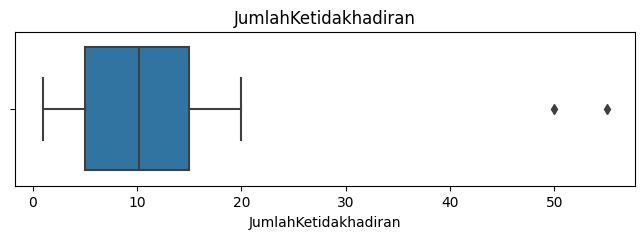

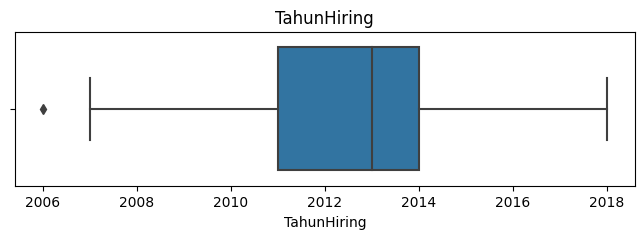

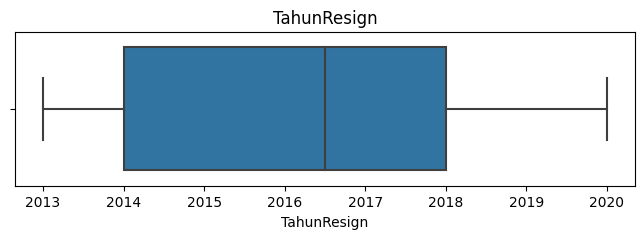

In [59]:
for column in df.select_dtypes(include=['float64']).columns:
    plt.figure(figsize=(8, 2))
    sns.boxplot(x=df[column])
    plt.title(column)
    plt.show()

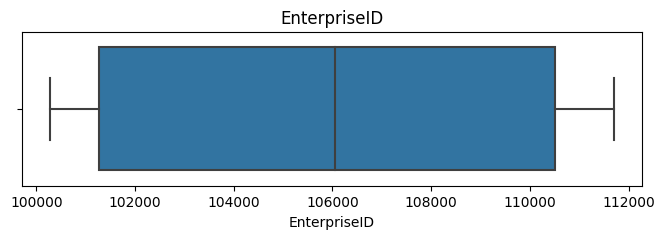

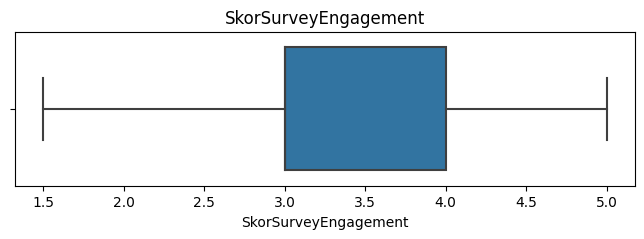

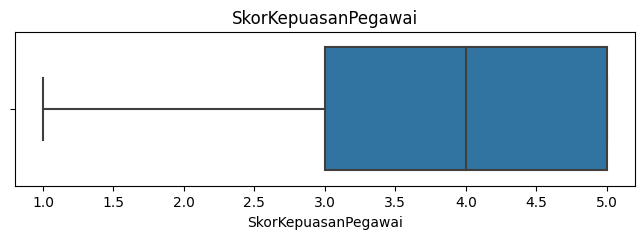

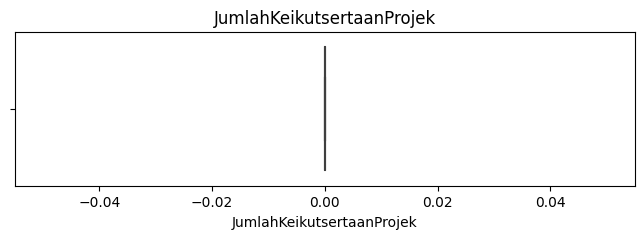

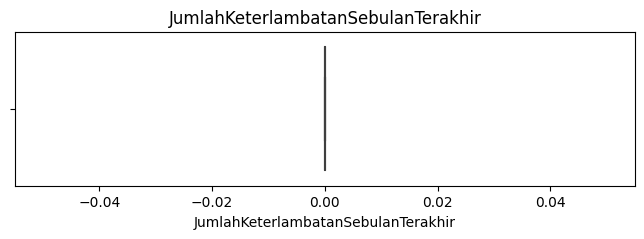

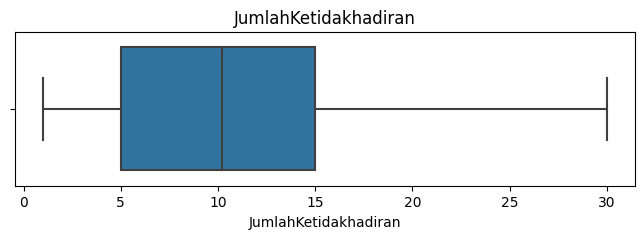

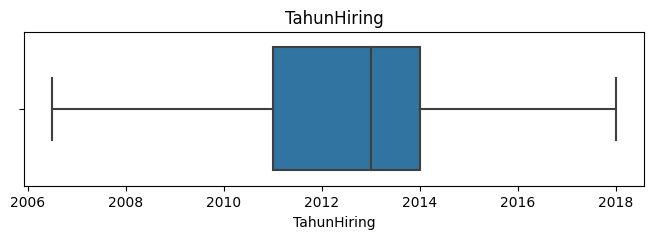

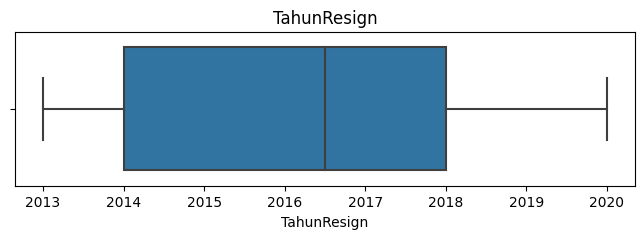

In [60]:
def handle_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return column.clip(lower_bound, upper_bound)

for column in df.select_dtypes(include=['float64']).columns:
    df[column] = handle_outliers(df[column])

for column in df.select_dtypes(include=['float64']).columns:
    plt.figure(figsize=(8, 2))
    sns.boxplot(x=df[column])
    plt.title(column)
    plt.show()


In [61]:
categorical_features = df.select_dtypes(include=['object']).columns
categorical_features_summary = {feature: df[feature].nunique() for feature in categorical_features}
categorical_features_summary

{'Username': 284,
 'StatusPernikahan': 5,
 'JenisKelamin': 2,
 'StatusKepegawaian': 3,
 'Pekerjaan': 14,
 'JenjangKarir': 3,
 'PerformancePegawai': 5,
 'AsalDaerah': 5,
 'HiringPlatform': 9,
 'NomorHP': 286,
 'Email': 286,
 'TingkatPendidikan': 3,
 'AlasanResign': 12,
 'TanggalLahir': 283,
 'TanggalPenilaianKaryawan': 126}

In [62]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['AlasanResign'])
y = df['AlasanResign']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

len(X_train), len(X_test)

(228, 58)

In [63]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['AlasanResign'])
y = df['AlasanResign']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

X_combined = pd.concat([X_train, X_test], keys=['train', 'test'])

for column in X_combined.select_dtypes(include=['object']).columns:
    X_combined[column] = X_combined[column].astype(str)

columns_to_ignore = ['Username', 'NomorHP', 'Email', 'TanggalLahir', 'TanggalHiring', 'TanggalPenilaianKaryawan', 'TanggalResign']
for column in X_combined.select_dtypes(include=['object']).columns:
    if column not in columns_to_ignore:
        le = LabelEncoder()
        X_combined[column] = le.fit_transform(X_combined[column])

X_train_encoded = X_combined.xs('train')
X_test_encoded = X_combined.xs('test')

training_data = pd.concat([X_train_encoded.drop(columns=columns_to_ignore), y_train], axis=1)

majority_class = training_data['AlasanResign'].mode()[0]
majority_data = training_data[training_data['AlasanResign'] == majority_class]

majority_class_count = majority_data.shape[0]
resampled_data = [majority_data]
for class_label in y_train.unique():
    if class_label != majority_class:
        minority_class_data = training_data[training_data['AlasanResign'] == class_label]
        resampled_class_data = resample(minority_class_data, replace=True, n_samples=majority_class_count, random_state=42)
        resampled_data.append(resampled_class_data)

balanced_data = pd.concat(resampled_data)
X_train_resampled = balanced_data.drop(columns=['AlasanResign'])
y_train_resampled = balanced_data['AlasanResign']


In [66]:
for column in X_combined.columns:
    X_combined[column] = X_combined[column].astype(str)

for column in X_combined.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X_combined[column] = le.fit_transform(X_combined[column])

X_train_encoded = X_combined.xs('train')
X_test_encoded = X_combined.xs('test')

training_data = pd.concat([X_train_encoded, y_train.astype(str)], axis=1)

majority_class = training_data['AlasanResign'].mode()[0]
majority_data = training_data[training_data['AlasanResign'] == majority_class]

majority_class_count = majority_data.shape[0]
resampled_data = [majority_data]
for class_label in y_train.unique():
    class_label_str = str(class_label)
    if class_label_str != majority_class:
        minority_class_data = training_data[training_data['AlasanResign'] == class_label_str]
        resampled_class_data = resample(minority_class_data, replace=True, n_samples=majority_class_count, random_state=42)
        resampled_data.append(resampled_class_data)

balanced_data = pd.concat(resampled_data)
X_train_resampled = balanced_data.drop(columns=['AlasanResign'])
y_train_resampled = balanced_data['AlasanResign']

X_train_resampled.head(), y_train_resampled.value_counts()

(     Username  EnterpriseID  StatusPernikahan  JenisKelamin  \
 145       102           130                 1             1   
 45        103            88                 1             1   
 31        240           163                 2             0   
 116       283           113                 4             1   
 96         51           244                 4             1   
 
      StatusKepegawaian  Pekerjaan  JenjangKarir  PerformancePegawai  \
 145                  0          3             2                   0   
 45                   0          3             2                   3   
 31                   2          4             1                   0   
 116                  0          4             2                   0   
 96                   0          2             0                   0   
 
      AsalDaerah  HiringPlatform  SkorSurveyEngagement  SkorKepuasanPegawai  \
 145           1               4                     1                    5   
 45            1      

In [67]:
models = [
    ('Logistic Regression', LogisticRegression(max_iter=10000, random_state=42)),
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('SVM', SVC(random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42))
]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test_encoded)

evaluation_results = []

for name, model in models:
    model.fit(X_train_scaled, y_train_resampled)

    y_pred = model.predict(X_test_scaled)

    accuracy = accuracy_score(y_test.astype(str), y_pred)
    f1 = f1_score(y_test.astype(str), y_pred, average='weighted')
    confusion_mat = confusion_matrix(y_test.astype(str), y_pred)

    evaluation_results.append((name, accuracy, f1, confusion_mat))

evaluation_results = [(name, f"Accuracy: {accuracy:.2f}", f"F1-Score: {f1:.2f}", f"Confusion Matrix:\n{confusion_mat}") for name, accuracy, f1, confusion_mat in evaluation_results]
evaluation_results

[('Logistic Regression',
  'Accuracy: 0.16',
  'F1-Score: 0.21',
  'Confusion Matrix:\n[[0 0 0 0 0 0 0 0 1 0 0 0]\n [0 2 0 3 0 2 2 0 1 0 3 0]\n [0 0 0 0 0 0 0 0 0 0 0 0]\n [0 0 0 0 0 0 0 0 1 2 0 0]\n [0 0 0 0 0 1 0 0 0 0 0 0]\n [0 1 0 1 0 0 0 0 0 0 1 0]\n [0 0 0 0 0 1 0 0 0 0 1 0]\n [0 1 0 0 0 0 0 0 1 0 0 0]\n [0 3 1 2 0 2 4 3 6 3 1 2]\n [1 0 0 0 0 0 1 0 0 0 0 0]\n [0 1 0 0 0 0 0 0 0 1 0 0]\n [0 0 0 0 0 0 1 0 0 0 0 1]]'),
 ('Random Forest',
  'Accuracy: 0.43',
  'F1-Score: 0.36',
  'Confusion Matrix:\n[[ 0  0  0  0  0  0  0  1  0  0  0]\n [ 0  7  1  0  0  0  0  5  0  0  0]\n [ 0  1  0  0  0  0  0  2  0  0  0]\n [ 0  0  0  0  0  0  0  1  0  0  0]\n [ 0  1  0  0  0  0  0  2  0  0  0]\n [ 0  1  0  0  0  0  0  1  0  0  0]\n [ 0  1  0  0  0  0  0  1  0  0  0]\n [ 0  8  1  0  0  0  0 18  0  0  0]\n [ 0  0  0  0  0  0  0  2  0  0  0]\n [ 0  1  0  0  0  0  0  1  0  0  0]\n [ 0  0  0  0  0  0  0  2  0  0  0]]'),
 ('SVM',
  'Accuracy: 0.40',
  'F1-Score: 0.34',
  'Confusion Matrix:\n[[ 0  0  0  

In [68]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', RandomForestClassifier(random_state=42))
])

param_grid = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [None, 10, 20, 30],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1_weighted', verbose=1, n_jobs=-1)

grid_search.fit(X_train_resampled, y_train_resampled)

best_model = grid_search.best_estimator_
best_score = grid_search.best_score_
best_params = grid_search.best_params_

best_score, best_params


Fitting 5 folds for each of 108 candidates, totalling 540 fits


(0.9755557493154974,
 {'model__max_depth': None,
  'model__min_samples_leaf': 1,
  'model__min_samples_split': 2,
  'model__n_estimators': 200})

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


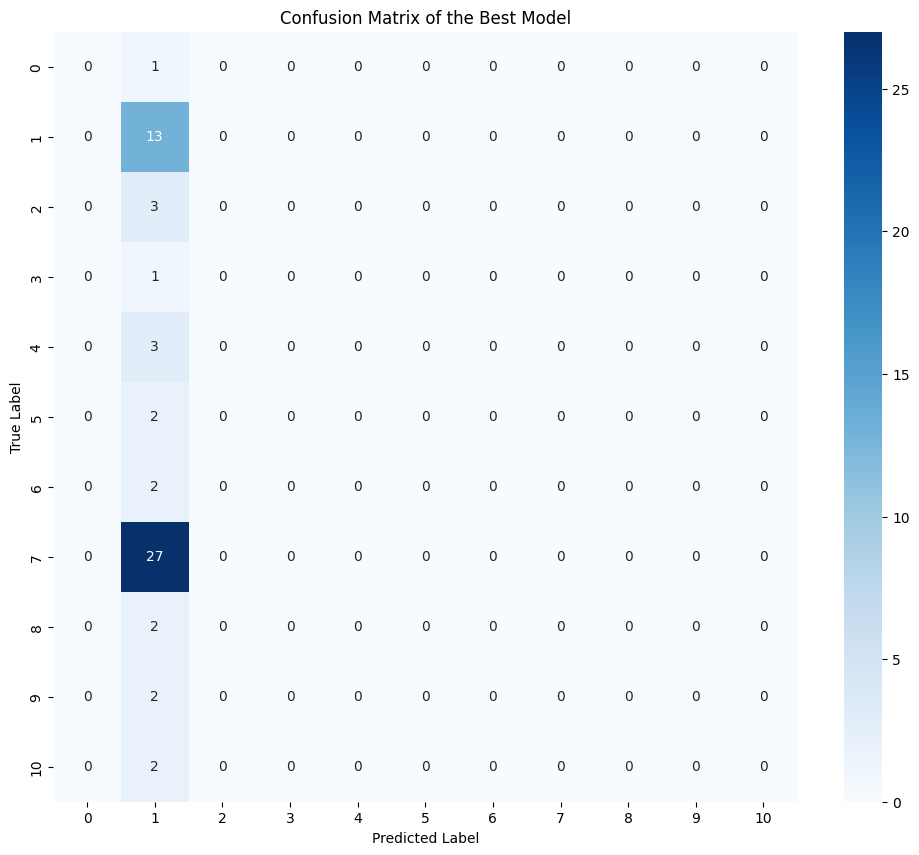

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

y_pred_best = best_model.predict(X_test_scaled)

confusion_mat_best = confusion_matrix(y_test.astype(str), y_pred_best)

plt.figure(figsize=(12, 10))
sns.heatmap(confusion_mat_best, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of the Best Model')
plt.show()

accuracy_best = accuracy_score(y_test.astype(str), y_pred_best)
f1_best = f1_score(y_test.astype(str), y_pred_best, average='weighted')